In [1]:
%matplotlib inline

import numpy as np, matplotlib.pyplot as plt, matplotlib.ticker as ticker, IPython.display as ipd
import librosa, librosa.display

# What is sound?

Sounds are vibrations that propage through air (or other medium). The vibrations manifest as air pressure changes. If the air pressure changes are sufficiently strong and the vibrations occur within a set of frequencies, they are picked up by the extremely sensitive machinery of our ears. This produces the sensation of hearing.

The frequencies that our ear can pick up on range from around 20 Hz to 20 000 Hz (or 20 kHz).

Hertz (hz) measure frequency, that is the number of oscillations per second.

This is what a one full oscillation looks like.

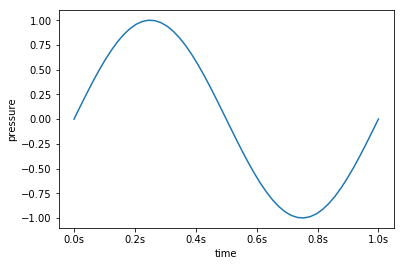

In [2]:
t = np.linspace(0, 1)
y = np.sin(2*np.pi*t)
ax = plt.subplot()
ax.plot(t,y)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2}s")) # https://docs.python.org/3/library/functions.html#format
plt.ylabel('pressure');
plt.xlabel('time');

1 oscillation per second = sound wave of frequency 1 Hz

The oscillation takes too long and would be outside of our hearing spectrum.

An oscillation we could hear could look something like this:

Text(0.5,1,'40 oscillations per second (frequency of 40 Hz)')

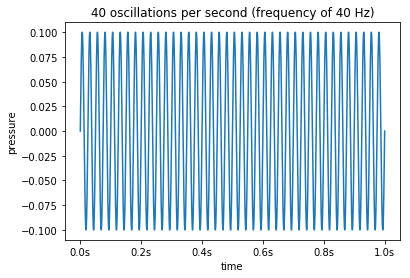

In [3]:
t = np.linspace(0, 1, 16000)
freq = 40
y = 0.1*np.sin(2*np.pi*t*freq)
ax = plt.subplot()
ax.plot(t,y)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2}s")) # https://docs.python.org/3/library/functions.html#format
plt.ylabel('pressure');
plt.xlabel('time');
plt.title(f'{freq} oscillations per second (frequency of {freq} Hz)')

In [4]:
ipd.Audio(y, rate=16000)

This can still be to low for your speakers to reproduce, but you should be able to hear the sound using your headphones.

Alternatively, you might want to change the `freq` parameter to something higher, say 200, and see if this should work better for you.

## Where does `digital` in Digital Signal Processing come from?

The sounds we hear are analog. The air pressure smoothly changes and could be modeled via a continuous line.

Problem is digital equipment doesn't operate like this. If you looked closely enough at your screen, you would see it is comprised of small dots called pixels. A line on your screen is not a single entity - it consists of a multitude of seperate little dots

A picture is translated into a grid of numbers to get stored inside the computer, with each value describing a single pixel.

Similarly, for sound, we take measurements of the air pressure, as measured by the microphone, every small time interval.

A measurement of a 1 Hz wave with a sample rate of 20 would look something like this

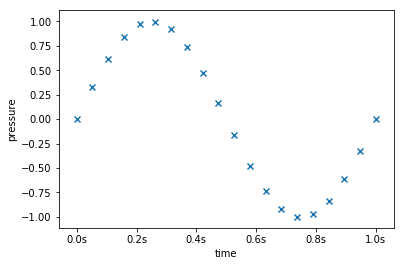

In [5]:
t = np.linspace(0, 1, num=20)
y = np.sin(2*np.pi*t)
ax = plt.subplot()
ax.scatter(t, y, marker='x')
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2}s")) # https://docs.python.org/3/library/functions.html#format
plt.ylabel('pressure');
plt.xlabel('time');

Nothing is straightforward in the land of the signals. Turns out for instance that if we sample with the same SR of 20 a signal of frequency 20...

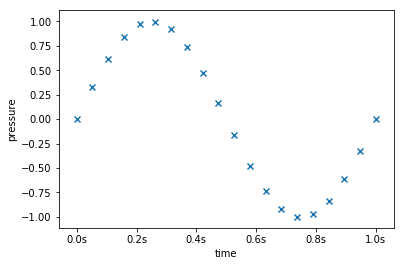

In [6]:
t = np.linspace(0, 1, num=20)
y = np.sin(2*np.pi*t*20)
ax = plt.subplot()
ax.scatter(t, y, marker='x')
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2}s")) # https://docs.python.org/3/library/functions.html#format
plt.ylabel('pressure');
plt.xlabel('time');

We get the same plot as above! This can be quite problematic - waves of two distinct frequencies produce the same digital recording!

The reason we encountered this problem is because we tried to sample a signal with frequency above the Nyquist frequency for our sample rate. You can learn more about what is going on in this [great and brief introductory text](https://jackschaedler.github.io/circles-sines-signals/sampling.html) available for free online. Check out those interactive visualizations - they are extremely fun to play with and give you great intuitions on many complex DSP topics.